# Importing Libraries & File

In [26]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.chdir('//Users//gaurav//Library//CloudStorage//OneDrive-Personal//Desktop//Oasis//Data Cleaning')

In [6]:
df=pd.read_csv('data1.csv')

# Checking Data 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.shape

(48895, 16)

In [10]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

here we can see that many columns contains null values and many columns are irrelevant in finding any insights 

# Data Cleaning 

In [13]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [15]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [16]:
df.drop(columns=['id','name','host_id','host_name','neighbourhood','last_review'],inplace=True)

In [18]:
df.shape

(48895, 10)

dropped these columns because they are just unique identifier , we cannot make any insights out of it 

In [19]:
df.isnull().sum()/len(df)*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [20]:
df['reviews_per_month']=df['reviews_per_month'].fillna(0)

In [21]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

some reviews contains null so i replaced them with 0 

now all null values are treated 

In [22]:
df.select_dtypes(int)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,149,1,9,6,365
1,225,1,45,2,355
2,150,3,0,1,365
3,89,1,270,1,194
4,80,10,9,1,0
...,...,...,...,...,...
48890,70,2,0,2,9
48891,40,4,0,2,36
48892,115,10,0,1,27
48893,55,1,0,6,2


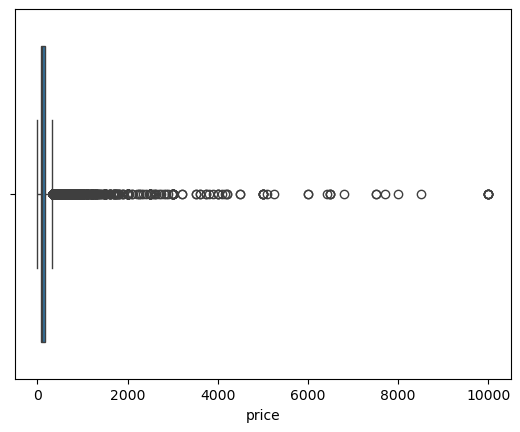

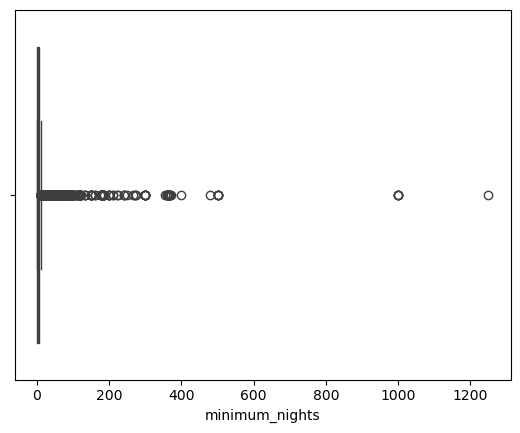

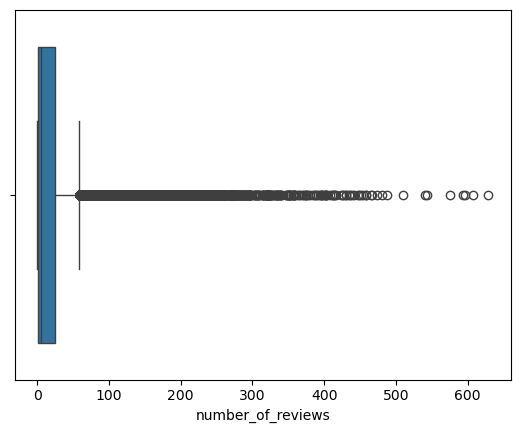

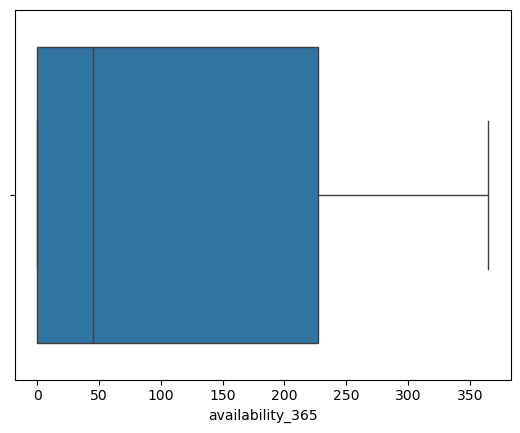

In [31]:
for i in ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']:
    sns.boxplot(data=df,x=i)
    plt.show()

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.090910,1.597283,0.00000,0.04000,0.37000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


here we can see that there are some ouliers which can give highly skew result if not treated ,
for example :
       Price, 
       minimum_nights,
       number_of_reviews
so we definetly need to treat them .

Other then these, outliers in 'availability' can be okay because it show the range

In [34]:
for i in ['price','minimum_nights']:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ur=q3+1.5*iqr
    lr=q1-1.5*iqr
    df[i]=df[i].clip(lower=lr,upper=ur)

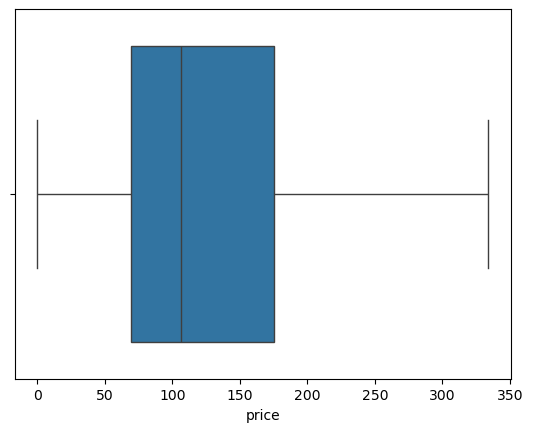

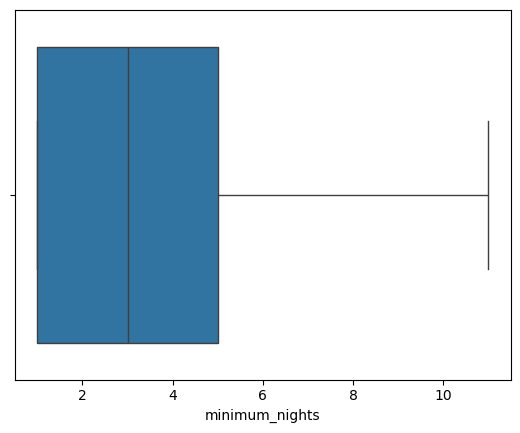

In [35]:
for i in ['price', 'minimum_nights']:
    sns.boxplot(data=df,x=i)
    plt.show()

neccesary ouliers were treated .

In [36]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


### our data is cleaned and ready for analyzation based on the given objective by our team .